In [19]:
import keras 
from keras.datasets import mnist
from keras.models import Sequential, model_from_json
from keras.layers import Dense
from keras.optimizers import SGD
from keras.callbacks import ModelCheckpoint


from sklearn.metrics import accuracy_score

from matplotlib import pyplot as plt


In [2]:
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()

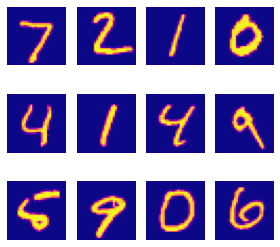

In [3]:
plt.figure( figsize= (4,4) )

for sch in range(12):
    plt.subplot( 3,4, sch+1)
    plt.imshow(X_valid[ sch], cmap='plasma')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [4]:
y_train.shape

(60000,)

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
28*28

784

In [7]:
X_train_L = X_train.reshape(60000, 784).astype('float32')
X_valid_L = X_valid.reshape(10000, 784).astype('float32')

In [8]:
X_train_L[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [9]:
X_train_L /=255
X_valid_L /= 255 


In [10]:
y_train = keras.utils.to_categorical(y_train, 10)
y_valid = keras.utils.to_categorical(y_valid, 10)


In [11]:
model = Sequential()
model.add(Dense(64, activation='sigmoid', input_shape=(784,) ) )
model.add(Dense(10, activation='softmax' ) )



In [12]:
model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'] )

In [26]:

#callback = ModelCheckpoint('weights.h5',
#              monitor='acc',
#              mode='max',
#              save_best_only=True)

model.fit(X_train_L, y_train, 
          batch_size=128, epochs=200, 
          verbose=1, validation_data=(X_valid_L, y_valid),
          callbacks=[callback])


Epoch 1/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0920 - accuracy: 0.9748 - val_loss: 0.1128 - val_accuracy: 0.9664
Epoch 2/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0918 - accuracy: 0.9748 - val_loss: 0.1129 - val_accuracy: 0.9663
Epoch 3/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0917 - accuracy: 0.9749 - val_loss: 0.1127 - val_accuracy: 0.9661
Epoch 4/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0916 - accuracy: 0.9748 - val_loss: 0.1127 - val_accuracy: 0.9663
Epoch 5/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0915 - accuracy: 0.9749 - val_loss: 0.1126 - val_accuracy: 0.9663
Epoch 6/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0914 - accuracy: 0.9750 - val_loss: 0.1125 - val_accuracy: 0.9664
Epoch 7/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0913 - accuracy: 0.9751 - val_loss: 0.1124 - val_accuracy: 0.9663

469/469 [==============================] - 1s 2ms/step - loss: 0.0889 - accuracy: 0.9756 - val_loss: 0.1107 - val_accuracy: 0.9666
Epoch 29/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0888 - accuracy: 0.9756 - val_loss: 0.1107 - val_accuracy: 0.9665
Epoch 30/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0887 - accuracy: 0.9757 - val_loss: 0.1105 - val_accuracy: 0.9669
Epoch 31/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0886 - accuracy: 0.9758 - val_loss: 0.1104 - val_accuracy: 0.9669
Epoch 32/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0885 - accuracy: 0.9758 - val_loss: 0.1104 - val_accuracy: 0.9668
Epoch 33/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0884 - accuracy: 0.9759 - val_loss: 0.1103 - val_accuracy: 0.9668
Epoch 34/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0882 - accuracy: 0.9757 - val_loss: 0.1103 - val_accuracy: 0.9667
Epoch

469/469 [==============================] - 1s 2ms/step - loss: 0.0860 - accuracy: 0.9765 - val_loss: 0.1087 - val_accuracy: 0.9672
Epoch 56/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0859 - accuracy: 0.9766 - val_loss: 0.1088 - val_accuracy: 0.9671
Epoch 57/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0858 - accuracy: 0.9765 - val_loss: 0.1086 - val_accuracy: 0.9675
Epoch 58/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0857 - accuracy: 0.9767 - val_loss: 0.1085 - val_accuracy: 0.9674
Epoch 59/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0856 - accuracy: 0.9767 - val_loss: 0.1084 - val_accuracy: 0.9676
Epoch 60/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0855 - accuracy: 0.9767 - val_loss: 0.1084 - val_accuracy: 0.9672
Epoch 61/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0854 - accuracy: 0.9768 - val_loss: 0.1083 - val_accuracy: 0.9674
Epoch

469/469 [==============================] - 1s 2ms/step - loss: 0.0833 - accuracy: 0.9775 - val_loss: 0.1068 - val_accuracy: 0.9680
Epoch 83/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0832 - accuracy: 0.9775 - val_loss: 0.1067 - val_accuracy: 0.9682
Epoch 84/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0831 - accuracy: 0.9775 - val_loss: 0.1067 - val_accuracy: 0.9679
Epoch 85/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0830 - accuracy: 0.9775 - val_loss: 0.1067 - val_accuracy: 0.9681
Epoch 86/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0829 - accuracy: 0.9777 - val_loss: 0.1066 - val_accuracy: 0.9680
Epoch 87/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0828 - accuracy: 0.9776 - val_loss: 0.1066 - val_accuracy: 0.9680
Epoch 88/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0827 - accuracy: 0.9776 - val_loss: 0.1064 - val_accuracy: 0.9682
Epoch

469/469 [==============================] - 1s 2ms/step - loss: 0.0808 - accuracy: 0.9783 - val_loss: 0.1051 - val_accuracy: 0.9685
Epoch 110/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0807 - accuracy: 0.9783 - val_loss: 0.1050 - val_accuracy: 0.9685
Epoch 111/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0806 - accuracy: 0.9782 - val_loss: 0.1049 - val_accuracy: 0.9685
Epoch 112/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0805 - accuracy: 0.9783 - val_loss: 0.1050 - val_accuracy: 0.9679
Epoch 113/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0804 - accuracy: 0.9783 - val_loss: 0.1048 - val_accuracy: 0.9682
Epoch 114/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0803 - accuracy: 0.9785 - val_loss: 0.1047 - val_accuracy: 0.9683
Epoch 115/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0802 - accuracy: 0.9783 - val_loss: 0.1048 - val_accuracy: 0.9684

469/469 [==============================] - 1s 2ms/step - loss: 0.0784 - accuracy: 0.9788 - val_loss: 0.1035 - val_accuracy: 0.9687
Epoch 137/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0783 - accuracy: 0.9790 - val_loss: 0.1035 - val_accuracy: 0.9687
Epoch 138/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0782 - accuracy: 0.9790 - val_loss: 0.1034 - val_accuracy: 0.9687
Epoch 139/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0781 - accuracy: 0.9790 - val_loss: 0.1032 - val_accuracy: 0.9686
Epoch 140/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0780 - accuracy: 0.9790 - val_loss: 0.1032 - val_accuracy: 0.9687
Epoch 141/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0779 - accuracy: 0.9791 - val_loss: 0.1032 - val_accuracy: 0.9687
Epoch 142/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0778 - accuracy: 0.9791 - val_loss: 0.1031 - val_accuracy: 0.9686

469/469 [==============================] - 1s 2ms/step - loss: 0.0761 - accuracy: 0.9797 - val_loss: 0.1020 - val_accuracy: 0.9689
Epoch 164/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0760 - accuracy: 0.9797 - val_loss: 0.1019 - val_accuracy: 0.9689
Epoch 165/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0759 - accuracy: 0.9796 - val_loss: 0.1019 - val_accuracy: 0.9690
Epoch 166/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0758 - accuracy: 0.9797 - val_loss: 0.1019 - val_accuracy: 0.9692
Epoch 167/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0757 - accuracy: 0.9798 - val_loss: 0.1018 - val_accuracy: 0.9693
Epoch 168/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0757 - accuracy: 0.9797 - val_loss: 0.1017 - val_accuracy: 0.9691
Epoch 169/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0756 - accuracy: 0.9798 - val_loss: 0.1017 - val_accuracy: 0.9692

469/469 [==============================] - 1s 2ms/step - loss: 0.0739 - accuracy: 0.9805 - val_loss: 0.1005 - val_accuracy: 0.9692
Epoch 191/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0738 - accuracy: 0.9804 - val_loss: 0.1006 - val_accuracy: 0.9693
Epoch 192/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0737 - accuracy: 0.9804 - val_loss: 0.1006 - val_accuracy: 0.9693
Epoch 193/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0737 - accuracy: 0.9805 - val_loss: 0.1005 - val_accuracy: 0.9695
Epoch 194/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0736 - accuracy: 0.9806 - val_loss: 0.1004 - val_accuracy: 0.9696
Epoch 195/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0735 - accuracy: 0.9805 - val_loss: 0.1003 - val_accuracy: 0.9692
Epoch 196/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0734 - accuracy: 0.9805 - val_loss: 0.1003 - val_accuracy: 0.9693

In [27]:
X_valid_L[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [28]:
 test  = model.predict(X_valid_L)

313/313 [==============================] - 0s 1ms/step


4.7245725e-05 ==> 0.0 ==> 0
4.4618574e-07 ==> 0.0 ==> 1
7.036324e-05 ==> 0.0 ==> 2
0.0004370395 ==> 0.0 ==> 3
9.962825e-08 ==> 0.0 ==> 4
2.345693e-05 ==> 0.0 ==> 5
3.420338e-10 ==> 0.0 ==> 6
0.99923015 ==> 1.0 ==> 7
3.2473602e-06 ==> 0.0 ==> 8
0.00018789388 ==> 0.0 ==> 9


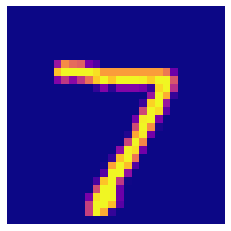

In [29]:
for ind, pr in enumerate(test[0]):
    print(pr, y_valid[0][ind], ind, sep=' ==> ')
    
plt.imshow(X_valid[ 0], cmap='plasma')
plt.axis('off')

plt.show()

In [31]:
with open('num_model.json', 'w') as f:
    f.write(model.to_json())
    

model.save_weights('weights.h5')

In [33]:
with open('num_model.json', 'r') as f:
    loaded_model = model_from_json(f.read())
    
loaded_model.load_weights('weights.h5')



313/313 [==============================] - 0s 881us/step
4.7245725e-05 ==> 0.0 ==> 0
4.4618574e-07 ==> 0.0 ==> 1
7.036324e-05 ==> 0.0 ==> 2
0.0004370395 ==> 0.0 ==> 3
9.962825e-08 ==> 0.0 ==> 4
2.345693e-05 ==> 0.0 ==> 5
3.420338e-10 ==> 0.0 ==> 6
0.99923015 ==> 1.0 ==> 7
3.2473602e-06 ==> 0.0 ==> 8
0.00018789388 ==> 0.0 ==> 9


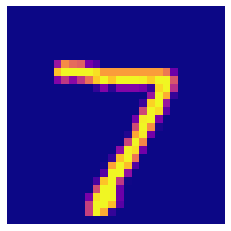

In [34]:
load_test  = loaded_model.predict(X_valid_L)
for ind, pr in enumerate(load_test[0]):
    print(pr, y_valid[0][ind], ind, sep=' ==> ')
    
plt.imshow(X_valid[ 0], cmap='plasma')
plt.axis('off')

plt.show()

In [ ]:
# доделать
plt.figure(figsize=(12,12), dpi= 80)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()
